# Using Convolutional Neural Networks

Welcome to the first week of the first deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Introduction to this week's task: 'Dogs vs Cats'

I'm trying to duplicate the sample code here

## Basic setup

In [1]:
%pwd

u'/home/ubuntu/git/courses/deeplearning1/nbs'

In [2]:
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir + '/data/redux'

In [3]:
from utils import *
from vgg16 import Vgg16
from __future__ import print_function

%matplotlib inline

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


# Prepare data files for Kaggle

To do:
    1. create validation set and sample
    2. move to separate dirs for each set
    3. finetune and train 
    4. submit

### Create validation set and sample

In [4]:
%cd $DATA_HOME_DIR

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux


In [5]:
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p sample/test
%mkdir -p test/unknown

In [6]:
%cd $DATA_HOME_DIR/train

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux/train


In [7]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000):
    os.rename(shuf[i], DATA_HOME_DIR+'/valid/' + shuf[i])

In [8]:
from shutil import copyfile

In [9]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200):
    copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/' + shuf[i])

In [10]:
%cd $DATA_HOME_DIR/valid

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux/valid


In [11]:
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50):
    copyfile(shuf[i], DATA_HOME_DIR+'/sample/valid/' + shuf[i])

### Move to separate dirs for each set

In [12]:
%cd $DATA_HOME_DIR/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux/sample/train


In [13]:
%cd $DATA_HOME_DIR/sample/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux/sample/valid


In [14]:
%cd $DATA_HOME_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux/train


In [15]:
%cd $DATA_HOME_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux/valid


In [16]:
%cd $DATA_HOME_DIR/test
%mv *.jpg unknown/

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux/test


### Finetune and train

In [4]:
%cd $DATA_HOME_DIR

/home/ubuntu/git/courses/deeplearning1/nbs/data/redux


In [32]:
path = DATA_HOME_DIR + '/'
test_path = DATA_HOME_DIR + '/test/'
results_path = DATA_HOME_DIR + '/results/'
train_path = DATA_HOME_DIR + '/train/'
valid_path = DATA_HOME_DIR + '/valid/'

In [6]:
vgg = Vgg16()

In [7]:
batch_size = 64
no_of_epochs = 1

In [22]:
batches = vgg.get_batches(train_path, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(batches)

vgg.model.optimizer.lr = 0.01

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [25]:
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print("Running epoch: {}".format(epoch))
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'ft{}.h5'.format(epoch)
    vgg.model.save_weights(results_path + latest_weights_filename)
print("Completed {} fit operations".format(no_of_epochs))

Running epoch: 0
Epoch 1/1
23000/23000 [==============================] - 738s - loss: 0.3102 - acc: 0.9773 - val_loss: 0.2615 - val_acc: 0.9800
Completed 1 fit operations


## Generate Prediction

In [26]:
batches, preds = vgg.test(path+'test', batch_size=batch_size*2)

Found 12500 images belonging to 1 classes.


In [27]:
filenames = batches.filenames

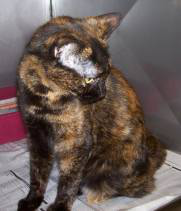

In [28]:
from PIL import Image
Image.open(test_path + filenames[2])

In [29]:
# Save our test results arrays so that we can use them again later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

## Validate Predictions

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

In [8]:
latest_weights_filename = 'ft{}.h5'.format(0)

In [9]:
vgg.model.load_weights(results_path+latest_weights_filename)

In [10]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 2000 images belonging to 2 classes.


In [11]:
filenames = val_batches.filenames
expected_labels = val_batches.classes

In [18]:
# Round our predictions to 0/1 
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [23]:
from keras.preprocessing import image

# Helper function to plot images by index, in the validation set
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
# Number of images to view for each visualisation task
n_views = 4

Found 1955 correct labels
[  48   38 1640 1099]


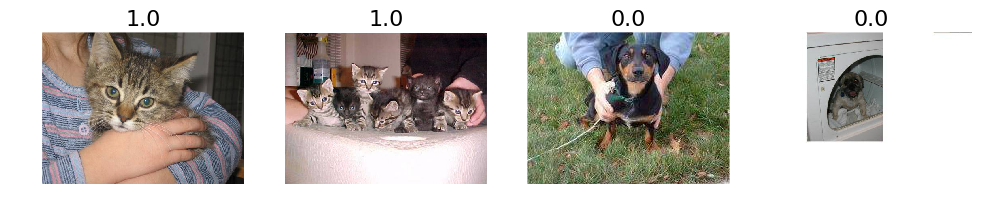

In [33]:
# 1. A few correct labels at random
correct = np.where(our_labels == expected_labels)[0]
print("Found {} correct labels".format(len(correct)))
idx = permutation(correct)[:n_views]
print(idx)
plots_idx(idx, our_predictions[idx])

Found 45 incorrect labels


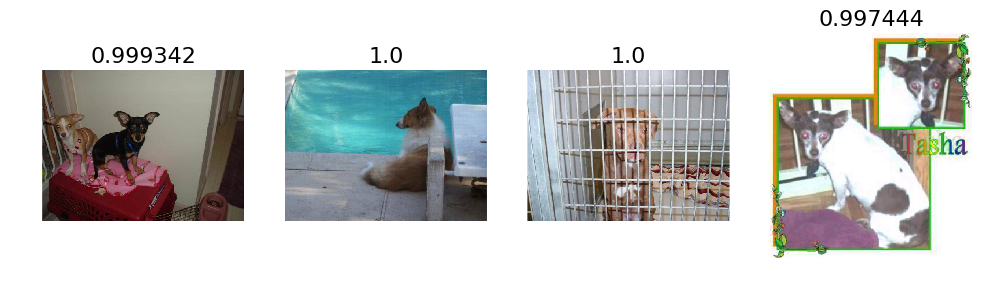

In [35]:
# 2. A few incorrect labels at random
incorrect = np.where(our_labels != expected_labels)[0]
print("Found {} incorrect labels".format(len(incorrect)))
idx = permutation(incorrect)[:n_views]
plots_idx(idx, our_predictions[idx])

Found 983 confident correct cats labels


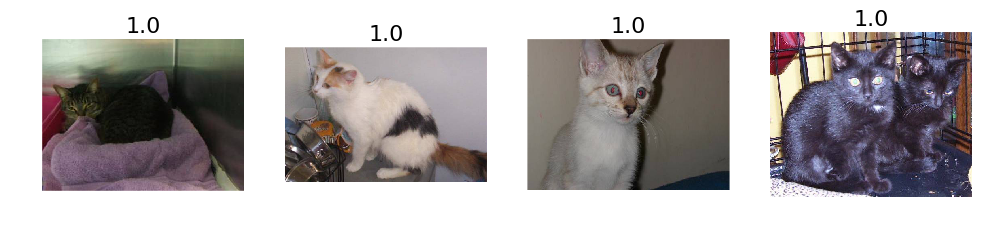

In [39]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0)&(our_labels==expected_labels))[0]
print("Found {} confident correct cats labels".format(len(correct_cats)))
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_views]
# print([most_correct_cats])
# print(correct_cats[most_correct_cats])
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats[most_correct_cats]])

In [ ]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1)&(our_labels==expected_labels))[0]
print("Found {} confident correct dogs labels".format(len(correct_dogs)))
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_views]
# print([most_correct_dogs])
# print(correct_dogs[most_correct_dogs])
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs[most_correct_dogs]])

In [ ]:
#4a. The images we most confident were cats, and are actually dogs
incorrect_cats = np.where((our_labels==0)&(our_labels!=expected_labels))[0]
print("Found {} confident incorrect cats labels".format(len(incorrect_cats)))
most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_views]
# print([most_incorrect_cats])
# print(incorrect_cats[most_incorrect_cats])
plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats[most_incorrect_cats]])

In [ ]:
#4b. The images we most confident were dogs, and are actually cats
incorrect_dogs = np.where((our_labels==1)&(our_labels!=expected_labels))[0]
print("Found {} confident incorrect dogs labels".format(len(incorrect_dogs)))
most_incorrect_dogs = np.argsort(our_predictions[incorrect_dogs])[:n_views]
# print([most_incorrect_dogs])
# print(incorrect_dogs[most_incorrect_dogs])
plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs[most_incorrect_dogs]])

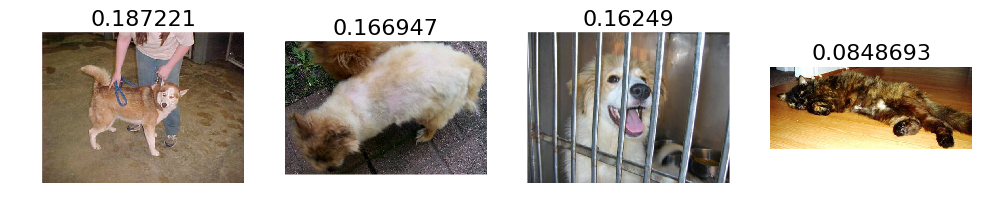

In [40]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_predictions-0.5))[:n_views]
plots_idx(most_uncertain, our_predictions[most_uncertain])

In [41]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

[[983  17]
 [ 28 972]]


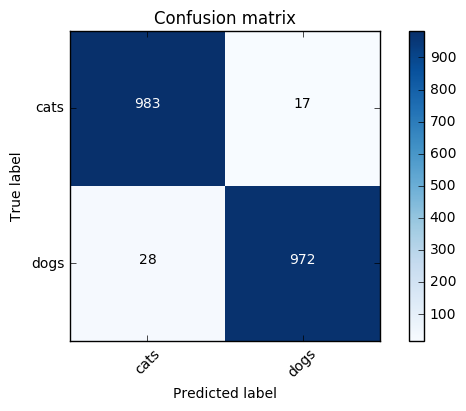

In [42]:
plot_confusion_matrix(cm, val_batches.class_indices)

## Submit Prediction to Kaggle